In [3]:
from pyrsimg import readTiff, imgShow  
import numpy as np
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt


In [4]:
path_ja3 = 'data/radar/JA3_GPN_2PfP106_216_20190101_232013_20190102_001626.nc'



In [ ]:
ja3 = nc.Dataset(path_ja3)
ja3


np.int32(106)

In [57]:
list(ja3['data_20/ku'].variables.keys())[0:]


['range_ocean',
 'range_ocean_compression_qual',
 'range_ocean_mle3',
 'range_ocean_mle3_compression_qual',
 'range_adaptive',
 'range_adaptive_compression_qual',
 'swh_ocean',
 'swh_ocean_compression_qual',
 'swh_ocean_mle3',
 'swh_ocean_mle3_compression_qual',
 'swh_adaptive',
 'swh_adaptive_compression_qual',
 'sig0_ocean',
 'sig0_ocean_compression_qual',
 'sig0_ocean_mle3',
 'sig0_ocean_mle3_compression_qual',
 'sig0_adaptive',
 'sig0_adaptive_compression_qual',
 'off_nadir_angle_wf_ocean',
 'off_nadir_angle_wf_ocean_compression_qual',
 'num_iterations_ocean',
 'num_iterations_ocean_mle3',
 'num_iterations_adaptive',
 'range_ocog',
 'sig0_ocog',
 'ocog_qual',
 'mqe_ocean',
 'mqe_ocean_mle3',
 'mqe_adaptive',
 'peakiness',
 'wvf_main_class']

In [25]:
lat_20hz_ja3, lon_20hz_ja3 = ja3['data_20/latitude'][:], ja3['data_20/longitude'][:]



'cycle_106-pass_216'

Text(0.5, 1.0, 'jason-3')

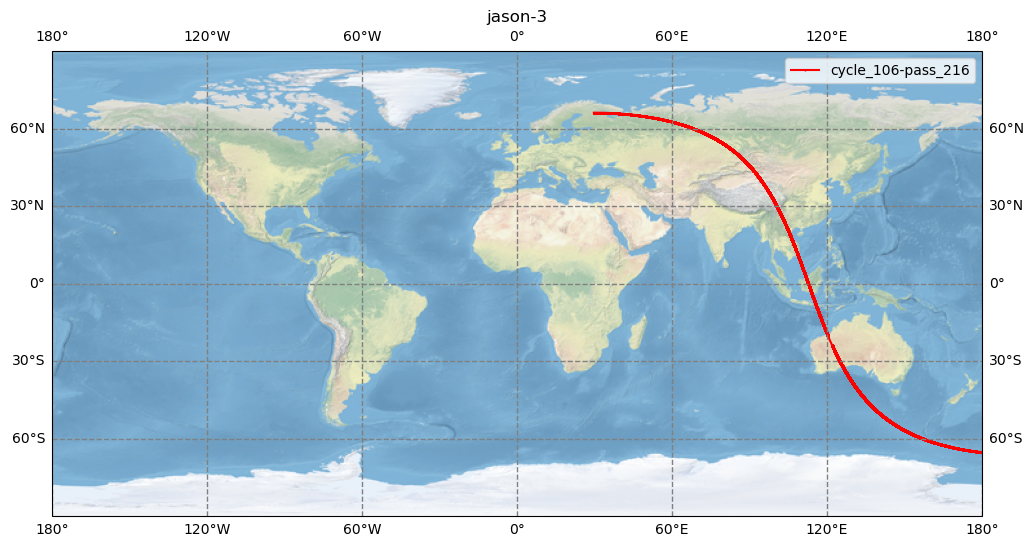

In [32]:
orbit_ja3 = 'cycle_'+str(ja3.cycle_number)+'-pass_'+str(ja3.pass_number)

proj = ccrs.PlateCarree(central_longitude=0.0)
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection=proj);
ax.stock_img()
ax.plot(lon_20hz_ja3, lat_20hz_ja3, marker='.', markersize=1,
                                label=orbit_ja3, color='red')

ax.gridlines(draw_labels=True, linewidth=1, color='gray', linestyle='--')
ax.legend();
plt.title('jason-3')



In [ ]:
## 2. remote sensing image
path_rsimg = 'data/rsimg/s2_yangzonghai_20200511_wgs84.tif'
rsimg = readTiff(path_rsimg)


In [ ]:
ids = np.where((lat_20hz_ja3>24.84) & (lat_20hz_ja3<24.98))



(array([20373, 20374, 20375, 20376, 20377, 20378, 20379, 20380, 20381,
        20382, 20383, 20384, 20385, 20386, 20387, 20388, 20389, 20390,
        20391, 20392, 20393, 20394, 20395, 20396, 20397, 20398, 20399,
        20400, 20401, 20402, 20403, 20404, 20405, 20406, 20407, 20408,
        20409, 20410, 20411, 20412, 20413, 20414, 20415, 20416, 20417,
        20418, 20419, 20420, 20421, 20422, 20423, 20424, 20425, 20426,
        20427, 20428, 20429]),)

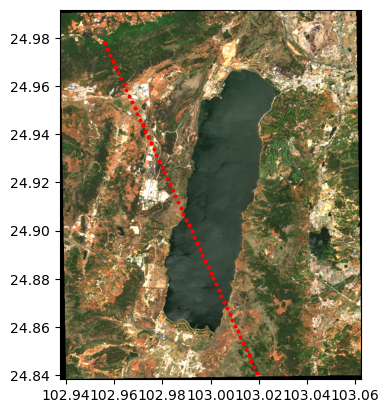

In [ ]:
imgShow(rsimg.array, extent=rsimg.geoextent)
plt.scatter(x=lon_20hz_ja3[ids], y=lat_20hz_ja3[ids], s=3.5, color='red')  ## jason data



In [63]:
ja3['data_20/ku/swh_adaptive'][ids]



masked_array(data=[2.224, --, 1.247, --, --, --, 1.975, 2.114, 4.08,
                   0.218, --, 1.623, --, 1.698, 1.672, 2.059,
                   2.3850000000000002, --, --, --, --, --, --, --, --, --,
                   3.197, --, --, --, --, --, --, --, --, --, 10.58, --,
                   --, --, --, 1.3980000000000001, --, --, --, --, 2.831,
                   3.083, --, --, 2.074, --, --, --, --, --, --],
             mask=[False,  True, False,  True,  True,  True, False, False,
                   False, False,  True, False,  True, False, False, False,
                   False,  True,  True,  True,  True,  True,  True,  True,
                    True,  True, False,  True,  True,  True,  True,  True,
                    True,  True,  True,  True, False,  True,  True,  True,
                    True, False,  True,  True,  True,  True, False, False,
                    True,  True, False,  True,  True,  True,  True,  True,
                    True],
       fill_value=np.int16(32